In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn
import pandas_profiling
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
pd.set_option('display.max_colwidth',-1)
data = pd.read_csv('Country-data.csv')

In [3]:
# Loading the dataset
data.head()

country  child_mort  exports  health  imports  income  \
0  Afghanistan          90.2        10.0     7.58    44.9     1610     
1  Albania              16.6        28.0     6.55    48.6     9930     
2  Algeria              27.3        38.4     4.17    31.4     12900    
3  Angola               119.0       62.3     2.85    42.9     5900     
4  Antigua and Barbuda  10.3        45.5     6.03    58.9     19100    

   inflation  life_expec  total_fer   gdpp  
0  9.44       56.2        5.82       553    
1  4.49       76.3        1.65       4090   
2  16.10      76.5        2.89       4460   
3  22.40      60.1        6.16       3530   
4  1.44       76.8        2.13       12200

In [4]:
# Data Dictionary
description = pd.read_csv('data-dictionary+.csv')

In [5]:
description

Column Name  \
0  country      
1  child_mort   
2  exports      
3  health       
4  imports      
5  Income       
6  Inflation    
7  life_expec   
8  total_fer    
9  gdpp         

                                                                                                        Description  
0  Name of the country                                                                                               
1  Death of children under 5 years of age per 1000 live births                                                       
2  Exports of goods and services per capita. Given as %age of the GDP per capita                                     
3  Total health spending per capita. Given as %age of GDP per capita                                                 
4  Imports of goods and services per capita. Given as %age of the GDP per capita                                     
5  Net income per person                                                                                             
6  The measurement of the annual growth rate of the Total GDP                                                        
7  The average number of years a new born child would live if the current mortality patterns are to remain the same  
8  The number of children that would be born to each woman if the current age-fertility rates remain the same.       
9  The GDP per capita. Calculated as the Total GDP divided by the total population.

In [6]:
description.Description

0    Name of the country                                                                                             
1    Death of children under 5 years of age per 1000 live births                                                     
2    Exports of goods and services per capita. Given as %age of the GDP per capita                                   
3    Total health spending per capita. Given as %age of GDP per capita                                               
4    Imports of goods and services per capita. Given as %age of the GDP per capita                                   
5    Net income per person                                                                                           
6    The measurement of the annual growth rate of the Total GDP                                                      
7    The average number of years a new born child would live if the current mortality patterns are to remain the same
8    The number of children that would be born to each w

In [7]:
data.profile_report()

In [8]:
# Some useful information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [9]:
# Some data insights
data.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000  167.000000      
mean   38.270060   41.108976   6.815689    46.890215   17144.688623    
std    40.328931   27.412010   2.746837    24.209589   19278.067698    
min    2.600000    0.109000    1.810000    0.065900    609.000000      
25%    8.250000    23.800000   4.920000    30.200000   3355.000000     
50%    19.300000   35.000000   6.320000    43.300000   9960.000000     
75%    62.100000   51.350000   8.600000    58.750000   22800.000000    
max    208.000000  200.000000  17.900000   174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000  167.000000     
mean   7.781832    70.555689   2.947964    12964.155689   
std    10.570704   8.893172    1.513848    18328.704809   
min   -4.210000    32.100000   1.150000    231.000000     
25%    1.810000    65.300000   1.795000    1330.000000    
50%    5.390000    73.100000   2.410000    4660.000000    
75%    10.750000   76.800000   3.880000    14050.000000   
max    104.000000  82.800000   7.490000    105000.000000

### Loking at the description of the data we can say that - 
- There are outliers for many features
- There are no missing values

# EDA

In [10]:
data.head()

country  child_mort  exports  health  imports  income  \
0  Afghanistan          90.2        10.0     7.58    44.9     1610     
1  Albania              16.6        28.0     6.55    48.6     9930     
2  Algeria              27.3        38.4     4.17    31.4     12900    
3  Angola               119.0       62.3     2.85    42.9     5900     
4  Antigua and Barbuda  10.3        45.5     6.03    58.9     19100    

   inflation  life_expec  total_fer   gdpp  
0  9.44       56.2        5.82       553    
1  4.49       76.3        1.65       4090   
2  16.10      76.5        2.89       4460   
3  22.40      60.1        6.16       3530   
4  1.44       76.8        2.13       12200

### Features like 'exports' , 'health' and 'imports' are in percentage of 'gdpp' therefore we need to convert them into actual numbers 

In [11]:
data['Exports'] = round(((data['exports'] * data['gdpp'])/100),2)
data['Health'] = round(((data['health'] * data['gdpp'])/100),2)
data['Imports'] = round(((data['imports'] * data['gdpp'])/100),2)

In [12]:
data.head()

country  child_mort  exports  health  imports  income  \
0  Afghanistan          90.2        10.0     7.58    44.9     1610     
1  Albania              16.6        28.0     6.55    48.6     9930     
2  Algeria              27.3        38.4     4.17    31.4     12900    
3  Angola               119.0       62.3     2.85    42.9     5900     
4  Antigua and Barbuda  10.3        45.5     6.03    58.9     19100    

   inflation  life_expec  total_fer   gdpp  Exports  Health  Imports  
0  9.44       56.2        5.82       553    55.30    41.92   248.30   
1  4.49       76.3        1.65       4090   1145.20  267.90  1987.74  
2  16.10      76.5        2.89       4460   1712.64  185.98  1400.44  
3  22.40      60.1        6.16       3530   2199.19  100.60  1514.37  
4  1.44       76.8        2.13       12200  5551.00  735.66  7185.80

In [13]:
# Dropping the 'exports', 'health' and 'imports' from the dataset
data.drop(['exports','health','imports'],1,inplace = True)

<AxesSubplot:xlabel='Health', ylabel='child_mort'>

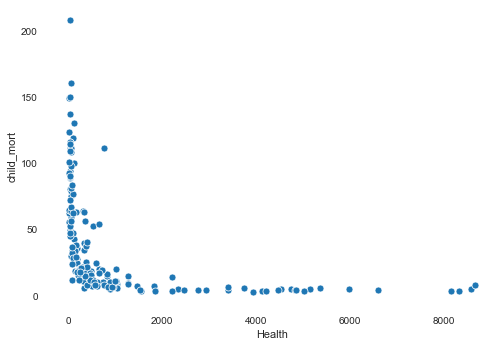

In [14]:
sns.scatterplot(x = data['Health'], y = data['child_mort'], data = data)

### We can clearly see that -
- As the health spending increase the child_mortality rate decreases, however there are outliers 

<AxesSubplot:xlabel='inflation', ylabel='child_mort'>

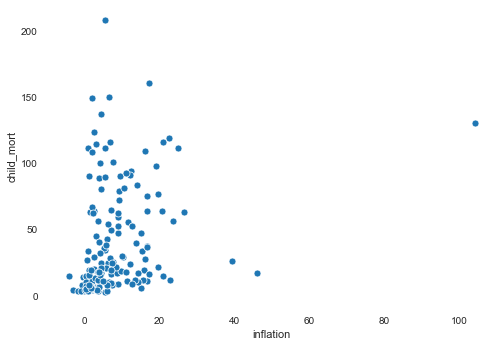

In [15]:
sns.scatterplot(x = data['inflation'], y = data['child_mort'], data = data)

### Lesser is the growth rate of the GDP,higher is the child mortality rate

In [16]:
data.head()

country  child_mort  income  inflation  life_expec  total_fer  \
0  Afghanistan          90.2        1610    9.44       56.2        5.82        
1  Albania              16.6        9930    4.49       76.3        1.65        
2  Algeria              27.3        12900   16.10      76.5        2.89        
3  Angola               119.0       5900    22.40      60.1        6.16        
4  Antigua and Barbuda  10.3        19100   1.44       76.8        2.13        

    gdpp  Exports  Health  Imports  
0  553    55.30    41.92   248.30   
1  4090   1145.20  267.90  1987.74  
2  4460   1712.64  185.98  1400.44  
3  3530   2199.19  100.60  1514.37  
4  12200  5551.00  735.66  7185.80

In [17]:
description

Column Name  \
0  country      
1  child_mort   
2  exports      
3  health       
4  imports      
5  Income       
6  Inflation    
7  life_expec   
8  total_fer    
9  gdpp         

                                                                                                        Description  
0  Name of the country                                                                                               
1  Death of children under 5 years of age per 1000 live births                                                       
2  Exports of goods and services per capita. Given as %age of the GDP per capita                                     
3  Total health spending per capita. Given as %age of GDP per capita                                                 
4  Imports of goods and services per capita. Given as %age of the GDP per capita                                     
5  Net income per person                                                                                             
6  The measurement of the annual growth rate of the Total GDP                                                        
7  The average number of years a new born child would live if the current mortality patterns are to remain the same  
8  The number of children that would be born to each woman if the current age-fertility rates remain the same.       
9  The GDP per capita. Calculated as the Total GDP divided by the total population.

<AxesSubplot:xlabel='income', ylabel='child_mort'>

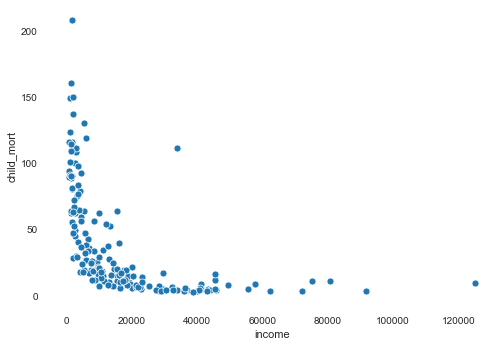

In [18]:
sns.scatterplot(x = data['income'], y = data['child_mort'], data = data)

### The above graph dipicts that income of a person makes a huge difference in child mortality rate
- Rate of child mortality is more for less income countries

<AxesSubplot:xlabel='gdpp'>

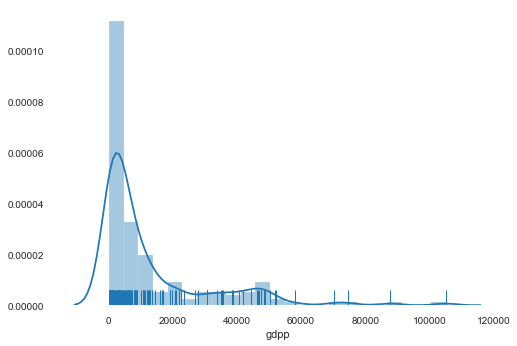

In [19]:
sns.distplot(data['gdpp'],kde=True, rug = True, norm_hist=True)

### GDP per capita is less than 5000 for most of the countries

<AxesSubplot:xlabel='child_mort'>

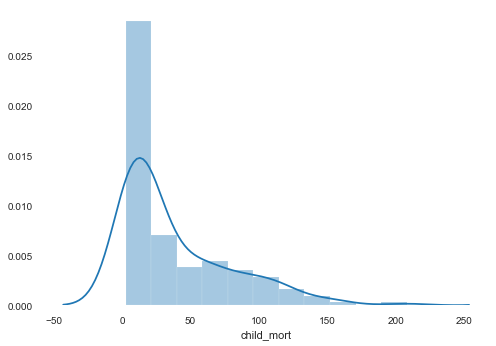

In [20]:
sns.distplot(data['child_mort'],kde=True)

### Most cuntries have a child mortality rate of less than 50

# Outlier Detection

### We will not remove the outliers due to less data. But we will cap the outliers wherever needed.

Text(0.5, 0.98, 'Income')

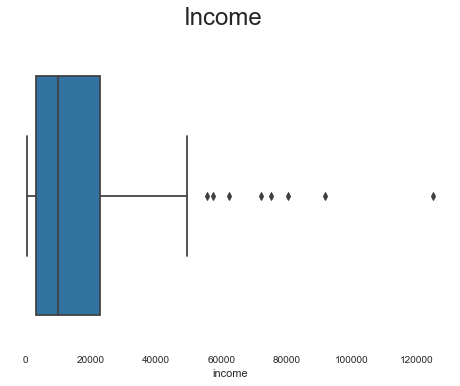

In [21]:
# Boxplot shows there are outliers in the income feature
sns.boxplot(x = data['income'], data = data)
plt.suptitle('Income',fontsize = 24)

In [22]:
# Countries with income more than 50000
high_income = data[data['income'] > 50000]
high_income

country  child_mort  income  inflation  life_expec  \
23   Brunei                10.5        80600   16.700     77.1         
82   Kuwait                10.8        75200   11.200     78.2         
91   Luxembourg            2.8         91700   3.620      81.3         
114  Norway                3.2         62300   5.950      81.0         
123  Qatar                 9.0         125000  6.980      79.5         
133  Singapore             2.8         72100  -0.046      82.7         
145  Switzerland           4.5         55500   0.317      82.2         
157  United Arab Emirates  8.6         57600   12.500     76.5         

     total_fer    gdpp   Exports   Health   Imports  
23   1.84       35300   23792.2   1002.52  9884.0    
82   2.21       38500   25679.5   1012.55  11704.0   
91   1.63       105000  183750.0  8158.50  149100.0  
114  1.95       87800   34856.6   8323.44  25023.0   
123  2.07       70300   43796.9   1272.43  16731.4   
133  1.15       46600   93200.0   1845.36  81084.0   
145  1.52       74600   47744.0   8579.00  39761.8   
157  1.87       35000   27195.0   1281.00  22260.0

In [23]:
# Capping the income data
q4 = data['income'].quantile(0.95)
data['income'][data['income'] >= q4] = q4

Text(0.5, 0.98, 'Income')

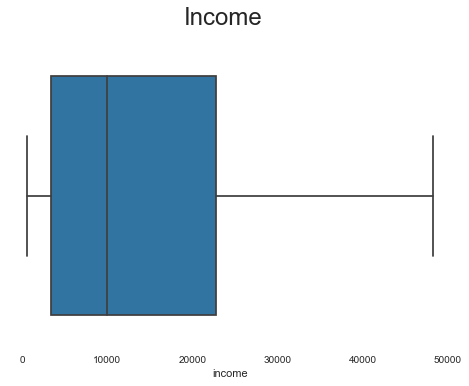

In [24]:
# Boxplot after treating the outliers
sns.boxplot(x = data['income'], data = data)
plt.suptitle('Income',fontsize = 24)

Text(0.5, 0.98, 'Child_mort')

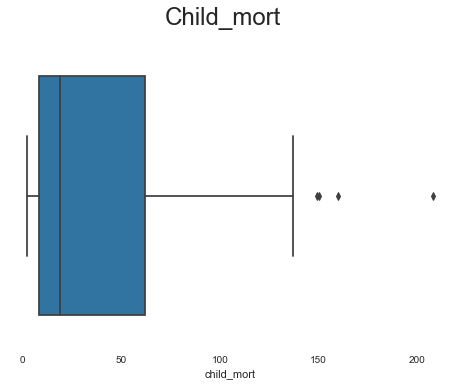

In [25]:
# Boxplot shows there are outliers in the child_mort feature
sns.boxplot(x = data['child_mort'], data = data)
plt.suptitle('Child_mort',fontsize = 24)

### We cannot cap the outliers in case of child_mort 

In [26]:
# Countries with child_mort rate of more than 130
high_child_mort = data[data['child_mort'] > 130]
high_child_mort

country  child_mort  income  inflation  life_expec  \
31   Central African Republic  149.0       888.0   2.01       47.5         
32   Chad                      150.0       1930.0  6.39       56.5         
66   Haiti                     208.0       1500.0  5.45       32.1         
97   Mali                      137.0       1870.0  4.37       59.5         
132  Sierra Leone              160.0       1220.0  17.20      55.0         

     total_fer  gdpp  Exports  Health  Imports  
31   5.21       446   52.63    17.75   118.19   
32   6.59       897   330.10   40.63   390.20   
66   3.33       662   101.29   45.74   428.31   
97   6.55       708   161.42   35.26   248.51   
132  5.20       399   67.03    52.27   137.66

Text(0.5, 0.98, 'Health')

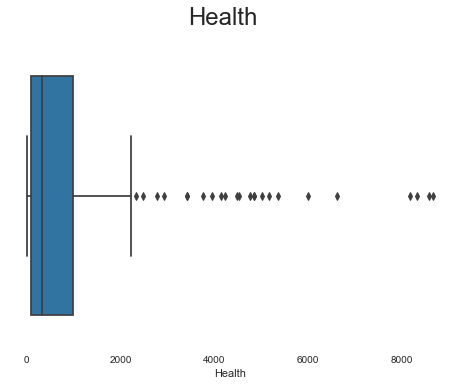

In [27]:
# Boxplot shows there are outliers in the heath feature
sns.boxplot(x = data['Health'], data = data)
plt.suptitle('Health',fontsize = 24)

### We can see that there are two many outliers in the 'Health' column and capping them would reduce the amount of information we have.

In [28]:
# Countries with health spending of more than 2000
high_health = data[data['Health'] > 2000]
high_health

country  child_mort   income  inflation  life_expec  total_fer  \
7    Australia       4.8         41400.0  1.160      82.0        1.93        
8    Austria         4.3         43200.0  0.873      80.5        1.44        
10   Bahamas         13.8        22900.0 -0.393      73.8        1.86        
15   Belgium         4.5         41100.0  1.880      80.0        1.86        
29   Canada          5.6         40700.0  2.870      81.3        1.63        
44   Denmark         4.1         44000.0  3.220      79.5        1.87        
53   Finland         3.0         39800.0  0.351      80.0        1.87        
54   France          4.2         36900.0  1.050      81.4        2.03        
58   Germany         4.2         40400.0  0.758      80.1        1.39        
60   Greece          3.9         28700.0  0.673      80.4        1.48        
68   Iceland         2.6         38800.0  5.470      82.0        2.20        
73   Ireland         4.2         45700.0 -3.220      80.4        2.05        
74   Israel          4.6         29600.0  1.770      81.4        3.03        
75   Italy           4.0         36200.0  0.319      81.7        1.46        
77   Japan           3.2         35800.0 -1.900      82.8        1.39        
91   Luxembourg      2.8         48290.0  3.620      81.3        1.63        
110  Netherlands     4.5         45500.0  0.848      80.7        1.79        
111  New Zealand     6.2         32300.0  3.730      80.9        2.17        
114  Norway          3.2         48290.0  5.950      81.0        1.95        
122  Portugal        3.9         27200.0  0.643      79.8        1.39        
135  Slovenia        3.2         28700.0 -0.987      79.5        1.57        
139  Spain           3.8         32500.0  0.160      81.9        1.37        
144  Sweden          3.0         42900.0  0.991      81.5        1.98        
145  Switzerland     4.5         48290.0  0.317      82.2        1.52        
158  United Kingdom  5.2         36200.0  1.570      80.3        1.92        
159  United States   7.3         48290.0  1.220      78.7        1.93        

       gdpp   Exports   Health   Imports  
7    51900   10276.2   4530.87  10847.1   
8    46900   24059.7   5159.00  22418.2   
10   28000   9800.0    2209.20  12236.0   
15   44400   33921.6   4750.80  33166.8   
29   47400   13793.4   5356.20  14694.0   
44   58000   29290.0   6612.00  25288.0   
53   46200   17879.4   4134.90  17278.8   
54   40600   10880.8   4831.40  11408.6   
58   41800   17681.4   4848.80  15507.8   
60   26900   5944.9    2770.70  8258.3    
68   41900   22374.6   3938.60  18142.7   
73   48700   50161.0   4475.53  42125.5   
74   30600   10710.0   2334.78  10067.4   
75   35800   9021.6    3411.74  9737.6    
77   44500   6675.0    4223.05  6052.0    
91   105000  183750.0  8158.50  149100.0  
110  50300   36216.0   5985.70  31990.8   
111  33700   10211.1   3403.70  9436.0    
114  87800   34856.6   8323.44  25023.0   
122  22500   6727.5    2475.00  8415.0    
135  23400   15046.2   2201.94  14718.6   
139  30700   7828.5    2928.78  8227.6    
144  52100   24070.2   5017.23  21204.7   
145  74600   47744.0   8579.00  39761.8   
158  38900   10969.8   3749.96  11981.2   
159  48400   6001.6    8663.60  7647.2

### We can observe that all the above countries spend a lot on their health from GDPP therefore they have a very less mortality rate

Text(0.5, 0.98, 'GDPP')

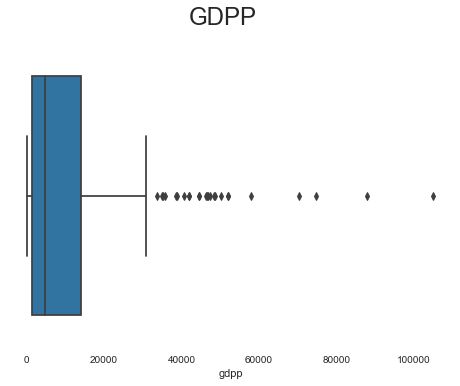

In [29]:
# Boxplot shows there are outliers in the gdp feature
sns.boxplot(x = data['gdpp'], data = data)
plt.suptitle('GDPP',fontsize = 24)

In [30]:
# Countries with health spending of more than 12 precent
high_gdp = data[data['gdpp'] > 35000]
high_gdp

country  child_mort   income  inflation  life_expec  total_fer  \
7    Australia       4.8         41400.0  1.160      82.0        1.93        
8    Austria         4.3         43200.0  0.873      80.5        1.44        
15   Belgium         4.5         41100.0  1.880      80.0        1.86        
23   Brunei          10.5        48290.0  16.700     77.1        1.84        
29   Canada          5.6         40700.0  2.870      81.3        1.63        
44   Denmark         4.1         44000.0  3.220      79.5        1.87        
53   Finland         3.0         39800.0  0.351      80.0        1.87        
54   France          4.2         36900.0  1.050      81.4        2.03        
58   Germany         4.2         40400.0  0.758      80.1        1.39        
68   Iceland         2.6         38800.0  5.470      82.0        2.20        
73   Ireland         4.2         45700.0 -3.220      80.4        2.05        
75   Italy           4.0         36200.0  0.319      81.7        1.46        
77   Japan           3.2         35800.0 -1.900      82.8        1.39        
82   Kuwait          10.8        48290.0  11.200     78.2        2.21        
91   Luxembourg      2.8         48290.0  3.620      81.3        1.63        
110  Netherlands     4.5         45500.0  0.848      80.7        1.79        
114  Norway          3.2         48290.0  5.950      81.0        1.95        
123  Qatar           9.0         48290.0  6.980      79.5        2.07        
133  Singapore       2.8         48290.0 -0.046      82.7        1.15        
144  Sweden          3.0         42900.0  0.991      81.5        1.98        
145  Switzerland     4.5         48290.0  0.317      82.2        1.52        
158  United Kingdom  5.2         36200.0  1.570      80.3        1.92        
159  United States   7.3         48290.0  1.220      78.7        1.93        

       gdpp   Exports   Health   Imports  
7    51900   10276.2   4530.87  10847.1   
8    46900   24059.7   5159.00  22418.2   
15   44400   33921.6   4750.80  33166.8   
23   35300   23792.2   1002.52  9884.0    
29   47400   13793.4   5356.20  14694.0   
44   58000   29290.0   6612.00  25288.0   
53   46200   17879.4   4134.90  17278.8   
54   40600   10880.8   4831.40  11408.6   
58   41800   17681.4   4848.80  15507.8   
68   41900   22374.6   3938.60  18142.7   
73   48700   50161.0   4475.53  42125.5   
75   35800   9021.6    3411.74  9737.6    
77   44500   6675.0    4223.05  6052.0    
82   38500   25679.5   1012.55  11704.0   
91   105000  183750.0  8158.50  149100.0  
110  50300   36216.0   5985.70  31990.8   
114  87800   34856.6   8323.44  25023.0   
123  70300   43796.9   1272.43  16731.4   
133  46600   93200.0   1845.36  81084.0   
144  52100   24070.2   5017.23  21204.7   
145  74600   47744.0   8579.00  39761.8   
158  38900   10969.8   3749.96  11981.2   
159  48400   6001.6    8663.60  7647.2

### Above countries have fairly high GDP and less child mortality rate

In [31]:
# Sorting the dataset with respect to the 'GDPP'
data_gdpp = data.sort_values(by='gdpp')
data_gdpp

country  child_mort   income  inflation  life_expec  total_fer  \
26   Burundi           93.6        764.0    12.300     57.7        6.26        
88   Liberia           89.3        700.0    5.470      60.8        5.02        
37   Congo, Dem. Rep.  116.0       609.0    20.800     57.5        6.54        
112  Niger             123.0       814.0    2.550      58.8        7.49        
132  Sierra Leone      160.0       1220.0   17.200     55.0        5.20        
..            ...        ...          ...      ...      ...         ...        
44   Denmark           4.1         44000.0  3.220      79.5        1.87        
123  Qatar             9.0         48290.0  6.980      79.5        2.07        
145  Switzerland       4.5         48290.0  0.317      82.2        1.52        
114  Norway            3.2         48290.0  5.950      81.0        1.95        
91   Luxembourg        2.8         48290.0  3.620      81.3        1.63        

       gdpp    Exports   Health    Imports  
26   231     20.61      26.80    90.55      
88   327     62.46      38.59    302.80     
37   334     137.27     26.42    165.66     
112  348     77.26      17.96    170.87     
132  399     67.03      52.27    137.66     
..   ...       ...        ...       ...     
44   58000   29290.00   6612.00  25288.00   
123  70300   43796.90   1272.43  16731.40   
145  74600   47744.00   8579.00  39761.80   
114  87800   34856.60   8323.44  25023.00   
91   105000  183750.00  8158.50  149100.00  

[167 rows x 10 columns]

<AxesSubplot:xlabel='income', ylabel='child_mort'>

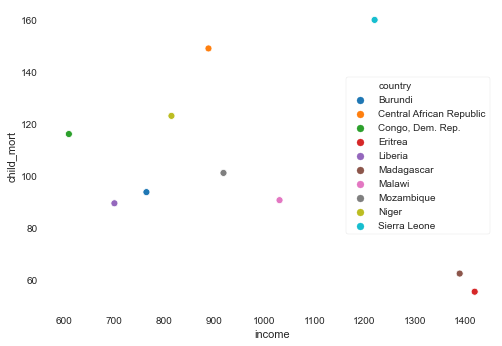

In [32]:
# Scatter plot of Top 10 countries with least GDP
sns.scatterplot(x = data['income'], y = data['child_mort'], hue = data_gdpp['country'][:10])

### We can see that countries with low GDP has less income and high child mortality rate

<AxesSubplot:xlabel='income', ylabel='child_mort'>

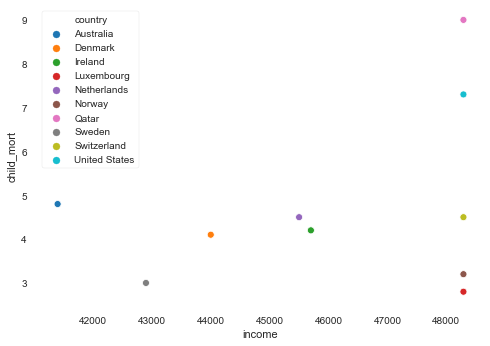

In [33]:
# Scatter plot of Top 10 countries with highest GDP
sns.scatterplot(x = data['income'], y = data['child_mort'], hue = data_gdpp['country'][157:])

### Above plot shows that countries with high GDP have high income and low child mortality as comapred to the under previledged countries

### Therefore we can say that developed nations have a low mortality rate

Text(0.5, 0.98, 'Inflation')

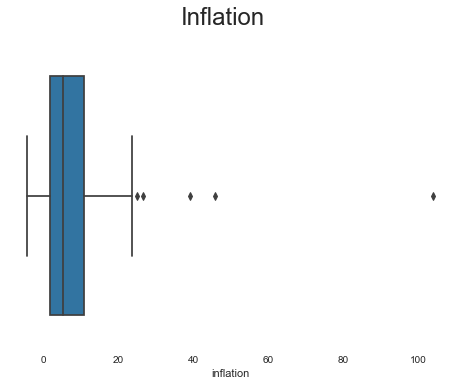

In [34]:
# Boxplot shows there are outliers in the inflation feature
sns.boxplot(x = data['inflation'], data = data)
plt.suptitle('Inflation',fontsize = 24)

In [35]:
# Countries with inflation of more than 22
high_inflation = data[data['inflation'] > 22]
high_inflation

country  child_mort   income  inflation  life_expec  total_fer  \
3    Angola             119.0       5900.0   22.4       60.1        6.16        
49   Equatorial Guinea  111.0       33700.0  24.9       60.9        5.21        
103  Mongolia           26.1        7710.0   39.2       66.2        2.64        
113  Nigeria            130.0       5150.0   104.0      60.5        5.84        
140  Sri Lanka          11.2        8560.0   22.8       74.4        2.20        
149  Timor-Leste        62.6        1850.0   26.5       71.1        6.23        
163  Venezuela          17.1        16500.0  45.9       75.4        2.47        
165  Yemen              56.3        4480.0   23.6       67.5        4.67        

      gdpp   Exports  Health   Imports  
3    3530   2199.19   100.60  1514.37   
49   17100  14671.80  766.08  10071.90  
103  2650   1237.55   144.16  1502.55   
113  2330   589.49    118.13  405.42    
140  2810   550.76    82.61   753.08    
149  3600   79.20     328.32  1000.80   
163  13500  3847.50   662.85  2376.00   
165  1310   393.00    67.86   450.64

Text(0.5, 0.98, 'Exports')

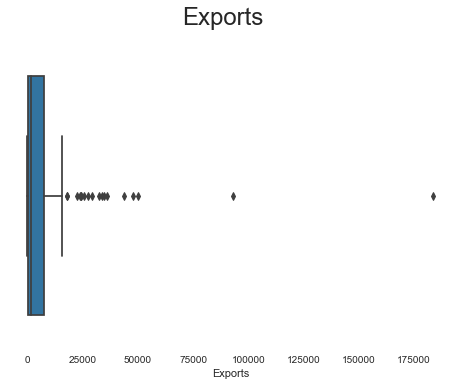

In [36]:
# Boxplot shows there are outliers in the Export feature
sns.boxplot(x = data['Exports'], data = data)
plt.suptitle('Exports',fontsize = 24)

In [37]:
# Countries with Exports of more than 30000
high_export = data[data['Exports'] > 30000]
high_export

country  child_mort   income  inflation  life_expec  total_fer  \
15   Belgium      4.5         41100.0  1.880      80.0        1.86        
73   Ireland      4.2         45700.0 -3.220      80.4        2.05        
91   Luxembourg   2.8         48290.0  3.620      81.3        1.63        
98   Malta        6.8         28300.0  3.830      80.3        1.36        
110  Netherlands  4.5         45500.0  0.848      80.7        1.79        
114  Norway       3.2         48290.0  5.950      81.0        1.95        
123  Qatar        9.0         48290.0  6.980      79.5        2.07        
133  Singapore    2.8         48290.0 -0.046      82.7        1.15        
145  Switzerland  4.5         48290.0  0.317      82.2        1.52        

       gdpp   Exports   Health   Imports  
15   44400   33921.6   4750.80  33166.8   
73   48700   50161.0   4475.53  42125.5   
91   105000  183750.0  8158.50  149100.0  
98   21100   32283.0   1825.15  32494.0   
110  50300   36216.0   5985.70  31990.8   
114  87800   34856.6   8323.44  25023.0   
123  70300   43796.9   1272.43  16731.4   
133  46600   93200.0   1845.36  81084.0   
145  74600   47744.0   8579.00  39761.8

In [38]:
# Capping the export data
q4 = data['Exports'].quantile(0.95)
data['Exports'][data['Exports'] >= q4] = q4

Text(0.5, 0.98, 'Exports')

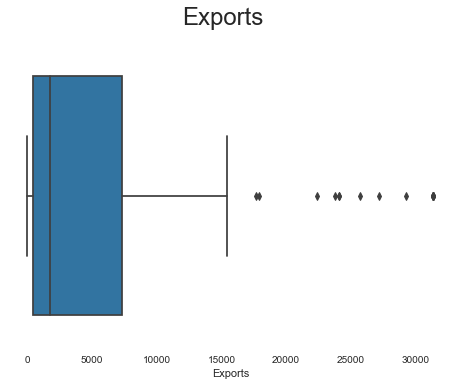

In [39]:
# Reduction in outliers after capping
sns.boxplot(x = data['Exports'], data = data)
plt.suptitle('Exports',fontsize = 24)

Text(0.5, 0.98, 'Imports')

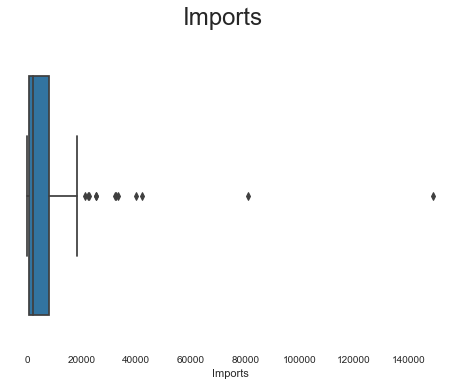

In [40]:
# Boxplot shows there are outliers in the Import feature
sns.boxplot(x = data['Imports'], data = data)
plt.suptitle('Imports',fontsize = 24)

In [41]:
# Countries with Exports of more than 20000
high_import = data[data['Imports'] > 20000]
high_import

country  child_mort   income  inflation  life_expec  \
8    Austria               4.3         43200.0  0.873      80.5         
15   Belgium               4.5         41100.0  1.880      80.0         
44   Denmark               4.1         44000.0  3.220      79.5         
73   Ireland               4.2         45700.0 -3.220      80.4         
91   Luxembourg            2.8         48290.0  3.620      81.3         
98   Malta                 6.8         28300.0  3.830      80.3         
110  Netherlands           4.5         45500.0  0.848      80.7         
114  Norway                3.2         48290.0  5.950      81.0         
133  Singapore             2.8         48290.0 -0.046      82.7         
144  Sweden                3.0         42900.0  0.991      81.5         
145  Switzerland           4.5         48290.0  0.317      82.2         
157  United Arab Emirates  8.6         48290.0  12.500     76.5         

     total_fer    gdpp  Exports   Health   Imports  
8    1.44       46900   24059.7  5159.00  22418.2   
15   1.86       44400   31385.1  4750.80  33166.8   
44   1.87       58000   29290.0  6612.00  25288.0   
73   2.05       48700   31385.1  4475.53  42125.5   
91   1.63       105000  31385.1  8158.50  149100.0  
98   1.36       21100   31385.1  1825.15  32494.0   
110  1.79       50300   31385.1  5985.70  31990.8   
114  1.95       87800   31385.1  8323.44  25023.0   
133  1.15       46600   31385.1  1845.36  81084.0   
144  1.98       52100   24070.2  5017.23  21204.7   
145  1.52       74600   31385.1  8579.00  39761.8   
157  1.87       35000   27195.0  1281.00  22260.0

In [42]:
# Capping the import data
q4 = data['Imports'].quantile(0.95)
data['Imports'][data['Imports'] >= q4] = q4

Text(0.5, 0.98, 'Imports')

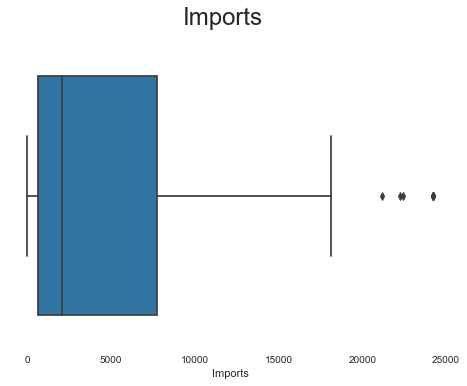

In [43]:
# Boxplot after capping 
sns.boxplot(x = data['Imports'], data = data)
plt.suptitle('Imports',fontsize = 24)

Text(0.5, 0.98, 'Life Expectancy')

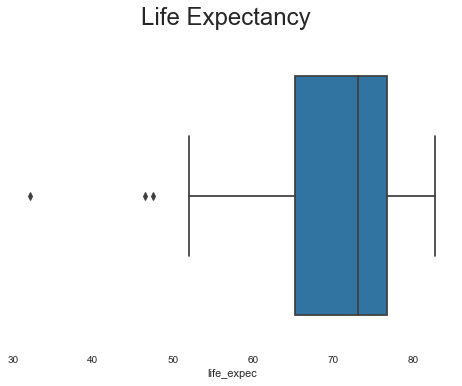

In [44]:
# Boxplot dipicting the life_expec feature
sns.boxplot(x = data['life_expec'], data = data)
plt.suptitle('Life Expectancy',fontsize = 24)

### We will not cap the lower range values for life_expec feature

Text(0.5, 0.98, 'Total Fertility')

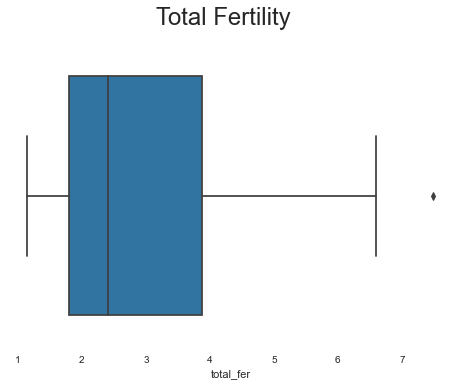

In [45]:
# Boxplot depicting the outlier in total_fer feature
sns.boxplot(x = data['total_fer'], data = data)
plt.suptitle('Total Fertility',fontsize = 24)

In [46]:
# Lets create a copy of original data
data1 = data.copy()

In [47]:
data1.head()

country  child_mort   income  inflation  life_expec  total_fer  \
0  Afghanistan          90.2        1610.0   9.44       56.2        5.82        
1  Albania              16.6        9930.0   4.49       76.3        1.65        
2  Algeria              27.3        12900.0  16.10      76.5        2.89        
3  Angola               119.0       5900.0   22.40      60.1        6.16        
4  Antigua and Barbuda  10.3        19100.0  1.44       76.8        2.13        

    gdpp  Exports  Health  Imports  
0  553    55.30    41.92   248.30   
1  4090   1145.20  267.90  1987.74  
2  4460   1712.64  185.98  1400.44  
3  3530   2199.19  100.60  1514.37  
4  12200  5551.00  735.66  7185.80

### Scaling the data

In [48]:
var = ['child_mort','Exports','Health','Imports','income','inflation','life_expec','total_fer','gdpp']
scaler = StandardScaler()
data1[var] = scaler.fit_transform(data1[var])

In [49]:
#data1.head()
data.head()

country  child_mort   income  inflation  life_expec  total_fer  \
0  Afghanistan          90.2        1610.0   9.44       56.2        5.82        
1  Albania              16.6        9930.0   4.49       76.3        1.65        
2  Algeria              27.3        12900.0  16.10      76.5        2.89        
3  Angola               119.0       5900.0   22.40      60.1        6.16        
4  Antigua and Barbuda  10.3        19100.0  1.44       76.8        2.13        

    gdpp  Exports  Health  Imports  
0  553    55.30    41.92   248.30   
1  4090   1145.20  267.90  1987.74  
2  4460   1712.64  185.98  1400.44  
3  3530   2199.19  100.60  1514.37  
4  12200  5551.00  735.66  7185.80

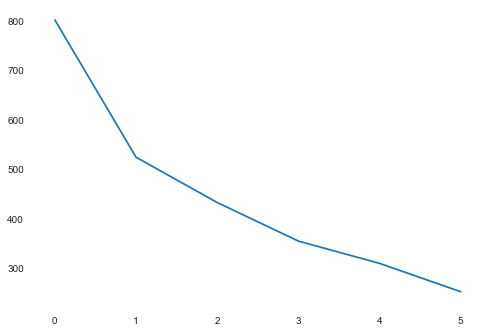

In [50]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state=40)
    kmeans.fit(data1.iloc[:,1:])
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

In [51]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(data1.iloc[:,1:])
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(data1.iloc[:,1:], cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4800954076342227
For n_clusters=3, the silhouette score is 0.4178267673563717
For n_clusters=4, the silhouette score is 0.3831132959114825
For n_clusters=5, the silhouette score is 0.4047042607212472
For n_clusters=6, the silhouette score is 0.3071596517151731
For n_clusters=7, the silhouette score is 0.31158432823670984
For n_clusters=8, the silhouette score is 0.29977710227633236


### We will pick 3 clusters from the silhouette score and elbow curve

## K-means Clustering

In [52]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=3, max_iter=50,random_state=40)
kmeans.fit(data1.iloc[:,1:])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=40, tol=0.0001, verbose=0)

In [53]:
data1['cluster_id'] = kmeans.labels_
data['cluster_id'] = kmeans.labels_

<AxesSubplot:>

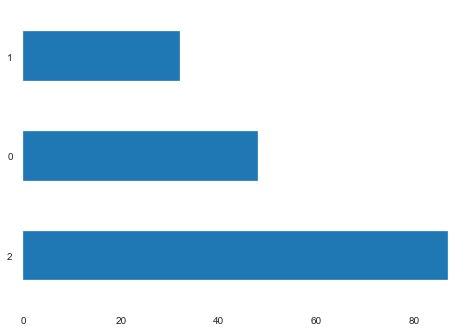

In [54]:
data1['cluster_id'].value_counts().plot.barh()

<AxesSubplot:xlabel='cluster_id'>

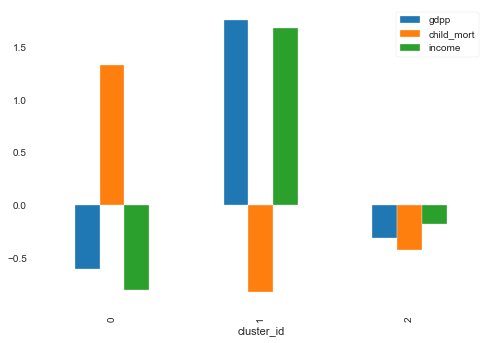

In [55]:
# Barplot of all three clusters on the basis of 'gdpp', 'child_mort' and 'income'
data1[['gdpp','child_mort','income','cluster_id']].groupby('cluster_id').mean().plot(kind = 'bar')

### We can clearly see that cluster 2 and cluster 0 have most dire need of aid with respect to the cluster 1

## CLuster Profiling

<AxesSubplot:xlabel='gdpp', ylabel='income'>

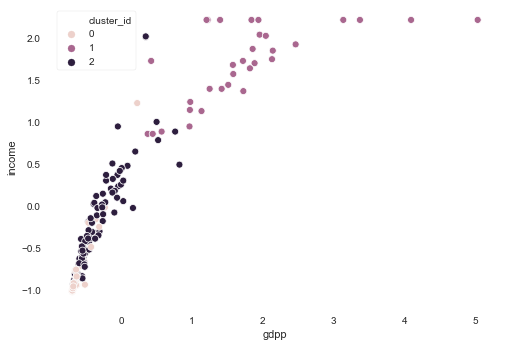

In [56]:
# 'GDPP' and 'Income'
sns.scatterplot(x = data1['gdpp'], y = data1['income'], data = data1, hue = 'cluster_id')

<AxesSubplot:xlabel='gdpp', ylabel='child_mort'>

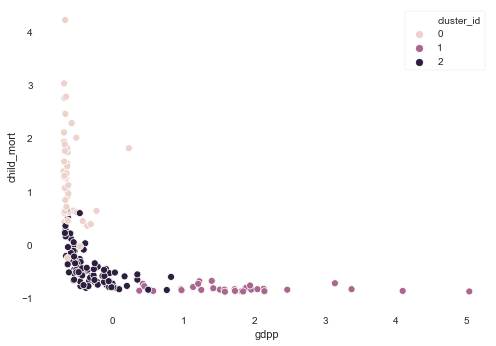

In [57]:
# 'GDPP' and 'Mortality Rate'
sns.scatterplot(x = data1['gdpp'], y = data1['child_mort'], data = data1, hue = 'cluster_id')

<AxesSubplot:xlabel='income', ylabel='child_mort'>

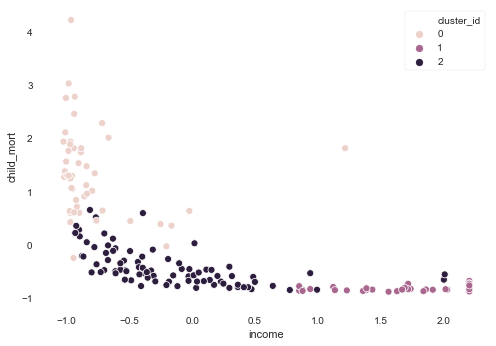

In [58]:
# 'Income' and 'Child Mortality'
sns.scatterplot(x = data1['income'], y = data1['child_mort'], data = data1, hue = 'cluster_id')

### From Cluster profiling we see that cluster 2 and cluster 0 are underpreviledged countries

<AxesSubplot:xlabel='cluster_id', ylabel='gdpp'>

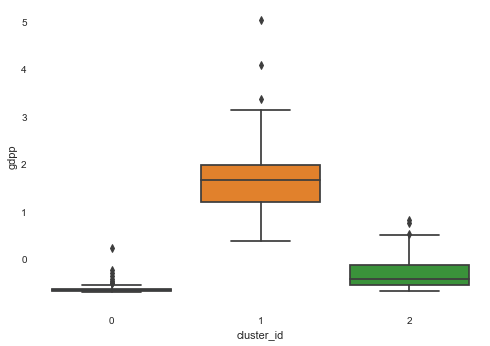

In [59]:
# GPD of each clusters
sns.boxplot(x = data1['cluster_id'], y = data1['gdpp'], data = data1)

<AxesSubplot:xlabel='cluster_id', ylabel='life_expec'>

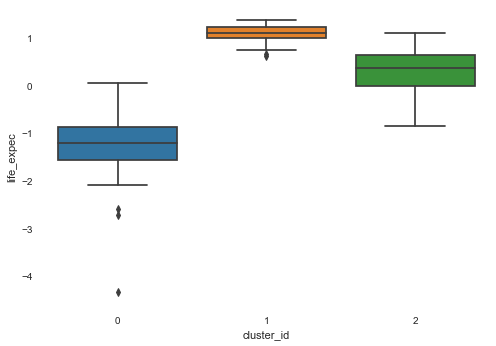

In [60]:
# Life Expectancy rate of each clusters
sns.boxplot(x = data1['cluster_id'], y = data1['life_expec'], data = data1)

<AxesSubplot:xlabel='cluster_id', ylabel='inflation'>

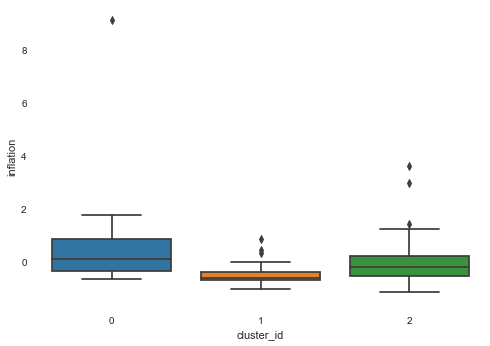

In [61]:
# Inflation rate of each cluster
sns.boxplot(x = data1['cluster_id'], y = data1['inflation'], data = data1)

<AxesSubplot:xlabel='cluster_id', ylabel='total_fer'>

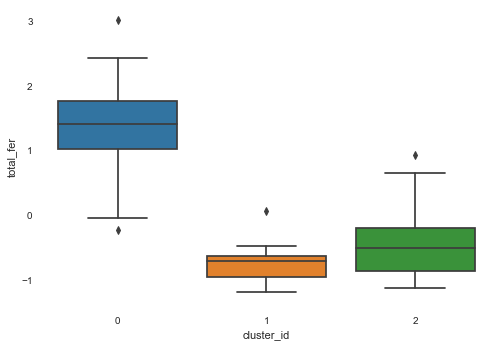

In [62]:
# Total fertility rate of each clusters
sns.boxplot(x = data1['cluster_id'], y = data1['total_fer'], data = data1)

<AxesSubplot:xlabel='cluster_id', ylabel='Health'>

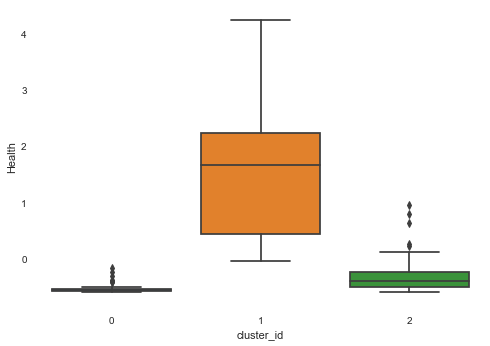

In [63]:
# Expenditure in the health sector cluster wise
sns.boxplot(x = data1['cluster_id'], y = data1['Health'], data = data1)

<AxesSubplot:xlabel='cluster_id', ylabel='income'>

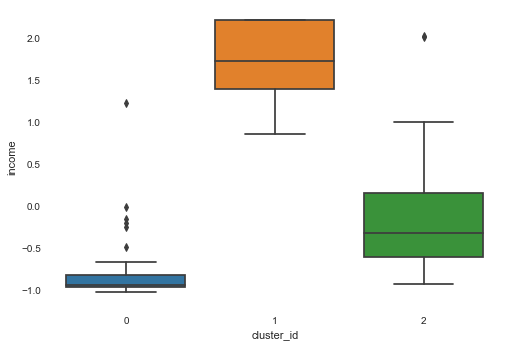

In [64]:
# Income of the countries cluster wise
sns.boxplot(x = data1['cluster_id'], y = data1['income'], data = data1)

## From the above boxplots we can observe that cluster 2 needs more support from the NGO
#### We prioritize the cluster as -
- 1.  Cluster 0
- 2.  Cluster 2
- 3.  Cluster 1
-

In [65]:
# Creating dataframes for all three clusters
cluster_0 = data1[data['cluster_id']== 0]
cluster_1 = data1[data['cluster_id']== 1]
cluster_2 = data1[data['cluster_id']== 2]

## Hierarchical Clustering

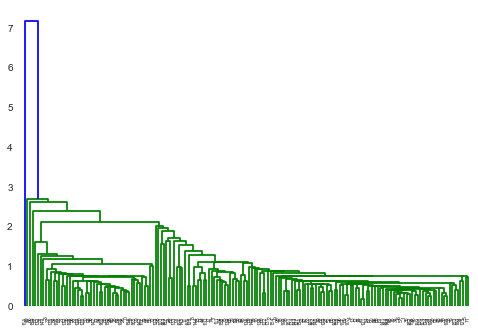

In [66]:
# single linkage
merging_0 = linkage(data1.iloc[:,1:], method="single", metric='euclidean')
dendrogram(merging_0)
plt.show()

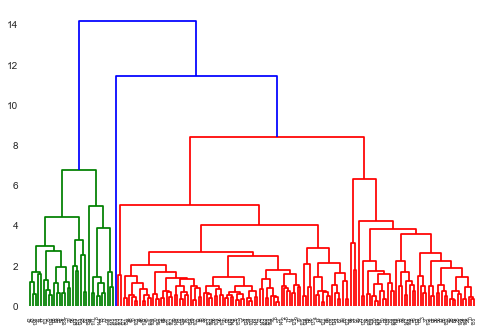

In [67]:
# Complete linkage
merging_1 = linkage(data1.iloc[:,1:], method="complete", metric='euclidean')
dendrogram(merging_1)
plt.show()

In [68]:
# 3 clusters
cluster_labels = cut_tree(merging_1, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [69]:
# assign cluster labels
data1['cluster_id'] = cluster_labels
data1.head()

country  child_mort    income  inflation  life_expec  \
0  Afghanistan          1.291532   -0.958349  0.157336  -1.619092     
1  Albania             -0.538949   -0.394006 -0.312347   0.647866     
2  Algeria             -0.272833   -0.192552  0.789274   0.670423     
3  Angola               2.007808   -0.667360  1.387054  -1.179234     
4  Antigua and Barbuda -0.695634    0.227992 -0.601749   0.704258     

   total_fer      gdpp   Exports    Health   Imports  cluster_id  
0  1.902882  -0.679180 -0.669581 -0.565038 -0.732728  0           
1 -0.859973  -0.485623 -0.542172 -0.439215 -0.472182  0           
2 -0.038404  -0.465376 -0.475838 -0.484827 -0.560152  0           
3  2.128151  -0.516268 -0.418960 -0.532366 -0.543087  0           
4 -0.541946  -0.041817 -0.027134 -0.178771  0.306422  0

<AxesSubplot:>

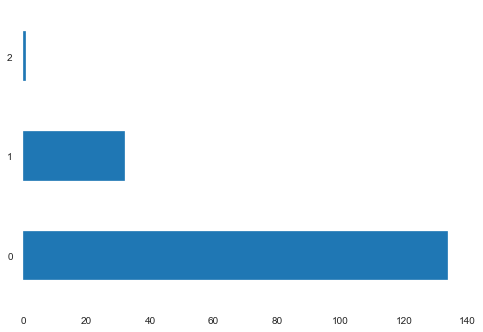

In [70]:
data1['cluster_id'].value_counts().plot.barh()

<AxesSubplot:xlabel='cluster_id'>

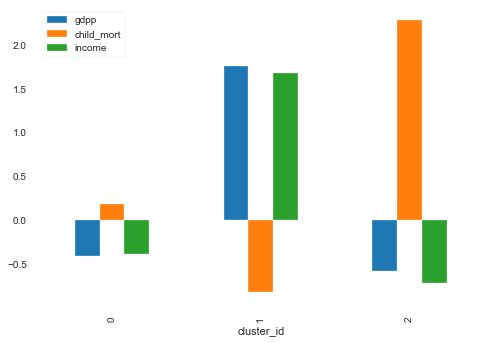

In [71]:
# Barplot of all three clusters on the basis of 'gdpp', 'child_mort' and 'income'
data1[['gdpp','child_mort','income','cluster_id']].groupby('cluster_id').mean().plot(kind = 'bar')

### When we choose 3 clusters for heirarchical clustering we get highly imbalance cluster

In [72]:
# We will make 4 clusters now
# 4 clusters
cluster_labels = cut_tree(merging_1, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 3, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 2, 0, 0, 1, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [73]:
# assign cluster labels
data1['cluster_id'] = cluster_labels
data1.head()

country  child_mort    income  inflation  life_expec  \
0  Afghanistan          1.291532   -0.958349  0.157336  -1.619092     
1  Albania             -0.538949   -0.394006 -0.312347   0.647866     
2  Algeria             -0.272833   -0.192552  0.789274   0.670423     
3  Angola               2.007808   -0.667360  1.387054  -1.179234     
4  Antigua and Barbuda -0.695634    0.227992 -0.601749   0.704258     

   total_fer      gdpp   Exports    Health   Imports  cluster_id  
0  1.902882  -0.679180 -0.669581 -0.565038 -0.732728  0           
1 -0.859973  -0.485623 -0.542172 -0.439215 -0.472182  1           
2 -0.038404  -0.465376 -0.475838 -0.484827 -0.560152  1           
3  2.128151  -0.516268 -0.418960 -0.532366 -0.543087  0           
4 -0.541946  -0.041817 -0.027134 -0.178771  0.306422  1

<AxesSubplot:>

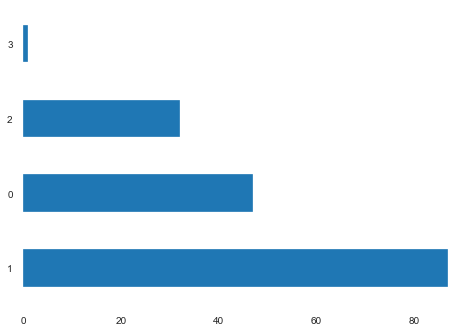

In [74]:
data1['cluster_id'].value_counts().plot.barh()

<AxesSubplot:xlabel='cluster_id'>

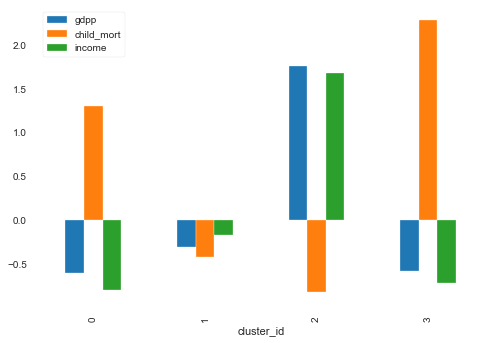

In [75]:
# Barplot of all three clusters on the basis of 'gdpp', 'child_mort' and 'income'
data1[['gdpp','child_mort','income','cluster_id']].groupby('cluster_id').mean().plot(kind = 'bar')

### Cluster Profiling for heirarchical clustering

<AxesSubplot:xlabel='gdpp', ylabel='income'>

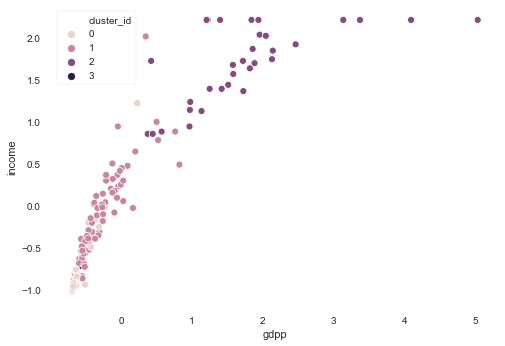

In [76]:
# 'GDPP' and 'Income'
sns.scatterplot(x = data1['gdpp'], y = data1['income'], data = data1, hue = 'cluster_id')

<AxesSubplot:xlabel='gdpp', ylabel='child_mort'>

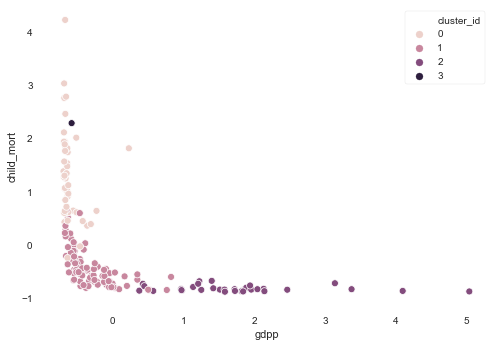

In [77]:
# 'GDPP' and 'Mortality Rate'
sns.scatterplot(x = data1['gdpp'], y = data1['child_mort'], data = data1, hue = 'cluster_id')

<AxesSubplot:xlabel='income', ylabel='child_mort'>

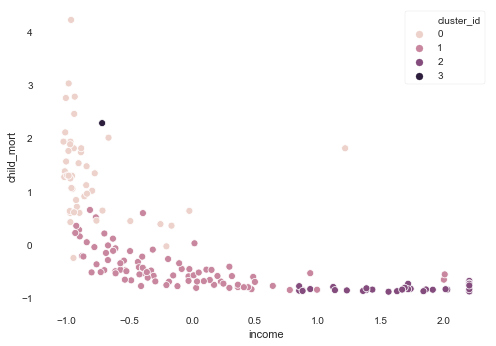

In [78]:
# 'Income' and 'Child Mortality'
sns.scatterplot(x = data1['income'], y = data1['child_mort'], data = data1, hue = 'cluster_id')

## After performing K-means clustering and Heirarchical clustering we can say that they gave different results. And according to the visualizations, Kmeans performed better than the latter.

In [79]:
data1.head()

country  child_mort    income  inflation  life_expec  \
0  Afghanistan          1.291532   -0.958349  0.157336  -1.619092     
1  Albania             -0.538949   -0.394006 -0.312347   0.647866     
2  Algeria             -0.272833   -0.192552  0.789274   0.670423     
3  Angola               2.007808   -0.667360  1.387054  -1.179234     
4  Antigua and Barbuda -0.695634    0.227992 -0.601749   0.704258     

   total_fer      gdpp   Exports    Health   Imports  cluster_id  
0  1.902882  -0.679180 -0.669581 -0.565038 -0.732728  0           
1 -0.859973  -0.485623 -0.542172 -0.439215 -0.472182  1           
2 -0.038404  -0.465376 -0.475838 -0.484827 -0.560152  1           
3  2.128151  -0.516268 -0.418960 -0.532366 -0.543087  0           
4 -0.541946  -0.041817 -0.027134 -0.178771  0.306422  1

#### We will use the clusters of Kmeans to make final suggestions

In [80]:
# If we were to pick top 5 countries for the aid. We will pick top 5 countries from cluster 0 of k-means

cluster_0.head()

country  child_mort    income  inflation  life_expec  total_fer  \
0   Afghanistan   1.291532   -0.958349  0.157336  -1.619092    1.902882    
3   Angola        2.007808   -0.667360  1.387054  -1.179234    2.128151    
17  Benin         1.808842   -0.944105 -0.654410  -0.987502    1.598107    
21  Botswana      0.353908   -0.165420  0.107996  -1.517586   -0.045030    
25  Burkina Faso  1.933196   -0.970558 -0.092213  -1.427359    1.936010    

        gdpp   Exports    Health   Imports  cluster_id  
0  -0.679180 -0.669581 -0.565038 -0.732728  0           
3  -0.516268 -0.418960 -0.532366 -0.543087  0           
17 -0.667961 -0.654957 -0.571074 -0.727683  0           
21 -0.361949 -0.352396 -0.294923 -0.281981  0           
25 -0.677976 -0.663140 -0.566798 -0.744427  0

In [81]:
# Countries with dire need of the aid
cluster_0.sort_values(by = ['child_mort','income','gdpp'], ascending = [False,True,True])[:5]

country  child_mort    income  inflation  life_expec  \
66   Haiti                     4.221297   -0.965810 -0.221257  -4.337186     
132  Sierra Leone              3.027505   -0.984802  0.893648  -1.754433     
32   Chad                      2.778798   -0.936643 -0.132065  -1.585257     
31   Central African Republic  2.753928   -1.007322 -0.547664  -2.600313     
97   Mali                      2.455480   -0.940713 -0.323734  -1.246905     

     total_fer      gdpp   Exports    Health   Imports  cluster_id  
66   0.253120  -0.673215 -0.664205 -0.562911 -0.705765  0           
132  1.492098  -0.687607 -0.668210 -0.559276 -0.749301  0           
32   2.413050  -0.660355 -0.637457 -0.565757 -0.711473  0           
31   1.498724  -0.685035 -0.669893 -0.578496 -0.752217  0           
97   2.386548  -0.670697 -0.657176 -0.568747 -0.732697  0

# Conclusion

### From the above k-means model we have selected top 5 countries with high child mortality rate and less 'GDPP' & 'Income'.

#### Countries:
- Haiti
- Sierra Leone
- Chad
- Central African Republic
- Mali